## Food Recommender System

In [1]:
!pwd

/home/shaima/code/Alanoudis/food-delivery-rec/notebooks/alshaima


In [2]:
import pandas as pd

file_path = "/home/shaima/code/Alanoudis/food-delivery-rec/data/updated_data/orders_sg25k.txt"
orders = pd.read_csv(file_path)



orders.head()

,Unnamed: 0,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


In [3]:
orders['order_id']

0            0
1            0
2            0
3            0
4            0
         ...  
24995    12177
24996    12178
24997    12179
24998    12180
24999    12180
Name: order_id, Length: 25000, dtype: int64

In [4]:
orders.shape

(25000, 9)

## Clean the Data
### Remove Unnecessary Columns

In [5]:
orders.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
orders.head(3)

,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days


In [7]:

file_path2 = "/home/shaima/code/Alanoudis/food-delivery-rec/data/raw_data/products_sg.txt"
products = pd.read_csv(file_path2)

products.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [8]:
products.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
products.head(3)

,vendor_id,product_id,name,unit_price
0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024


In [10]:

file_path3 = "/home/shaima/code/Alanoudis/food-delivery-rec/data/raw_data/vendors_sg.txt"
vendors = pd.read_csv(file_path3)

vendors.head()

,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,0,b160c319,d2786168,w21z6,mexican
1,1,9c8f010e,d2786168,w21ze,mexican
2,4,03eb25e1,5055ab25,w21ze,bak kut teh
3,5,3613129a,8984acb6,w23b1,italian
4,7,0946c9e5,1e3a2913,w21z4,bak kut teh


In [11]:
vendors.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
vendors.head(3)

,vendor_id,chain_id,geohash,primary_cuisine
0,b160c319,d2786168,w21z6,mexican
1,9c8f010e,d2786168,w21ze,mexican
2,03eb25e1,5055ab25,w21ze,bak kut teh


In [13]:

# Step 1: Merge orders with products on vendor_id and product_id
orders_products = orders.merge(products, on=['vendor_id', 'product_id'], how='left')

# Step 2: Merge the result with vendors on vendor_id
full_data = orders_products.merge(vendors, on='vendor_id', how='left')

# Preview the final merged dataset
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


In [14]:
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


In [15]:
full_data.shape

(25000, 13)

### 🗺️ Geohash Distribution

<Axes: title={'center': 'Top Geohash Areas'}, xlabel='geohash'>

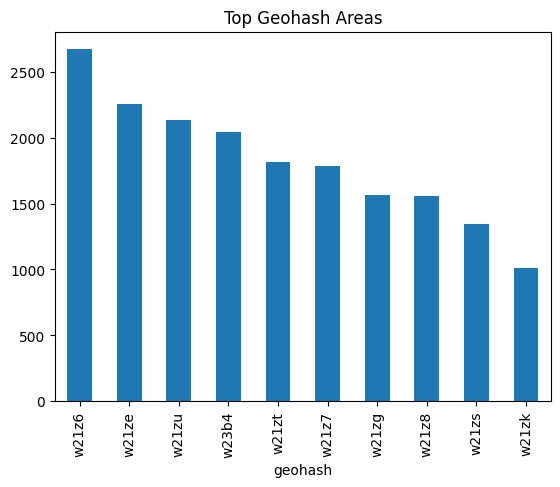

In [16]:
orders['geohash'].value_counts().head(10).plot(kind='bar', title='Top Geohash Areas')

In [17]:
full_data.isnull().sum()

customer_id           0
geohash_x             0
order_id              0
vendor_id             0
product_id            0
day_of_week           0
order_time            0
order_day             0
name                  0
unit_price            0
chain_id           3487
geohash_y             0
primary_cuisine       0
dtype: int64

In [18]:
full_data = full_data.dropna(subset=['chain_id'])
full_data.shape

(21513, 13)

In [19]:
global_cuisine_category = {
    "japanese": "japanese",
    "ramen": "japanese",
    "sushi": "japanese",

    "chinese": "chinese",
    "dim sum": "chinese",
    "mala xiang guo": "chinese",
    "mala soups": "chinese",
    "hokkien mee": "chinese",
    "noodles": "chinese",
    "tea": "chinese",

    "indian": "indian",
    "curry": "indian",

    "thai": "thai",

    "vietnamese": "vietnamese",
    "pho": "vietnamese",

    "singaporean": "singaporean",
    "chicken rice": "singaporean",
    "ban mian": "singaporean",
    "yong tau foo": "singaporean",

    "indonesian": "indonesian",
    "ayam penyet": "indonesian",

    "malaysian": "malaysian",
    "nasi lemak": "malaysian",
    "roti prata": "malaysian",

    "american": "american",
    "burgers": "american",
    "sandwiches": "american",
    "grill": "american",
    "fries": "american",
    "fast food": "american",

    "italian": "italian",
    "pizza": "italian",
    "pasta": "italian",

    "french": "french",
    "german": "german",
    "spanish": "spanish",
    "mexican": "mexican",
    "turkish": "turkish",
    "lebanese": "lebanese",

    # Reassign rice-based dishes
    "rice dishes": "asian",
    "fried rice": "asian",
    "porridge": "asian",

    # Everything else defaults to snacks
}


In [20]:
full_data['cuisine_origin'] = full_data['primary_cuisine'].str.strip().map(global_cuisine_category)
full_data['cuisine_origin'].fillna('snacks', inplace=True)

/tmp/ipykernel_38349/605251586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['cuisine_origin'].fillna('snacks', inplace=True)


In [21]:
print(full_data[['primary_cuisine', 'cuisine_origin']].drop_duplicates().sort_values(by='primary_cuisine'))

     primary_cuisine cuisine_origin
3347       acai bowl         snacks
66          american       american
51             asian         snacks
203      ayam penyet     indonesian
2915     bak kut teh         snacks
...              ...            ...
92        vegetarian         snacks
1558      vietnamese     vietnamese
142          western         snacks
5098           wraps         snacks
657     yong tau foo    singaporean

[69 rows x 2 columns]


# add rate based on each dish (Product) 
show order frequency in the app for each customer ,

i added 3 new columns (rating	,order_frequency)

In [22]:
import numpy as np
import pandas as pd

# Set seed for reproducibility (optional)
np.random.seed(42)

# Total number of rows
n_rows =full_data.shape[0]
# Count UNIQUE orders per customer (not rows)
order_counts = full_data.groupby('customer_id')['order_id'].nunique()

# Map order counts back to original dataframe
full_data['order_frequency'] = full_data['customer_id'].map(order_counts)

# Define thresholds based on order frequency quartiles
high_freq_threshold = full_data['order_frequency'].quantile(0.75)
medium_freq_threshold = full_data['order_frequency'].quantile(0.50)


# Initialize rating column
ratings = np.zeros(n_rows)

# Assign ratings based on order frequency
for idx in range(n_rows):
    order_freq = full_data.iloc[idx, full_data.columns.get_loc('order_frequency')]

    if order_freq >= high_freq_threshold:
        # Most frequent orders: mostly 5 stars
        ratings[idx] = np.random.choice([5, 4, 3], p=[0.85, 0.10, 0.05])

    elif order_freq >= medium_freq_threshold:
        # Medium frequency: some lower ratings for 1, 2, 3 stars
        ratings[idx] = np.random.choice([5, 4, 3, 2, 1], p=[0.30, 0.25, 0.25, 0.15, 0.05])

    else:
        # Lower frequency: random distribution
        ratings[idx] = np.random.randint(1, 6)

# Add rating column to dataframe
full_data['rating'] = ratings.astype(int)

In [23]:
order_counts = full_data.groupby('customer_id')['order_id'].nunique()
order_counts

customer_id
008ab40ac0    1
008ce71183    3
00ba08bab4    1
00c41737f8    2
00e9c13b02    1
             ..
ff8baf4dab    2
ffc217c6b1    1
ffd9dd9790    3
ffe455a0e2    1
fff7f1daa4    6
Name: order_id, Length: 2541, dtype: int64

In [25]:
full_data = full_data.drop('primary_cuisine', axis=1)

In [ ]:
full_data['order_frequency'].unique()

array([  1,  11,   2,   4,   3,  13,   8,  10,   6,   7,   9,   5,  23,
        22,  14,  12,  26,  17,  15,  32,  43,  16,  37,  24,  45,  33,
        18,  19,  20,  46,  27,  78,  21,  29, 343,  98,  28,  55,  39,
        34,  42,  25])

In [26]:
customer_id = "e42896593b"

# عرض كل الطلبات لهذا العميل
customer_orders = full_data[full_data['customer_id'] == customer_id]
customer_orders


,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,cuisine_origin,order_frequency,rating
9986,e42896593b,w23b4,4799,f1a4ba57,aead7837680a,0,08:10:20,36 days,Iced White Chocolate Mocha,0.0028,89370eab,w23b4,snacks,3,1
9987,e42896593b,w23b4,4799,f1a4ba57,aead7837680a,0,08:10:20,36 days,Iced White Chocolate Mocha,0.0028,89370eab,w23b4,snacks,3,5
9988,e42896593b,w23b4,4800,0f316e15,8efad4b8dee0,3,11:09:45,46 days,D18 Basil Minced Beef Rice with Egg,0.0032,89e648c7,w21zt,chinese,3,2
9989,e42896593b,w23b4,4800,0f316e15,2507a7385014,3,11:09:45,46 days,D5 Stir-Fried Kuay Teow,0.0028,89e648c7,w21zt,chinese,3,3
9990,e42896593b,w23b4,4800,0f316e15,27f1d99c21b9,3,11:09:45,46 days,D16 Green Curry Fried Rice,0.0028,89e648c7,w21zt,chinese,3,1
9991,e42896593b,w23b4,4800,0f316e15,f26aa1ae4338,3,11:09:45,46 days,D13 Thai Balachan Fried Rice,0.0028,89e648c7,w21zt,chinese,3,3
9992,e42896593b,w23b4,4800,0f316e15,1bf2ad967f2d,3,11:09:45,46 days,D15 Tom Yam Fried Rice,0.0028,89e648c7,w21zt,chinese,3,3
9993,e42896593b,w23b4,4800,0f316e15,74ec2a8e7c79,3,11:09:45,46 days,D4 Thai Stir-fried Seafood Kuay Teow,0.0028,89e648c7,w21zt,chinese,3,4
9994,e42896593b,w23b4,4801,0f316e15,74ec2a8e7c79,1,11:29:19,58 days,D4 Thai Stir-fried Seafood Kuay Teow,0.0028,89e648c7,w21zt,chinese,3,4
9995,e42896593b,w23b4,4801,0f316e15,f26aa1ae4338,1,11:29:19,58 days,D13 Thai Balachan Fried Rice,0.0028,89e648c7,w21zt,chinese,3,3
